# $H_2O$ experiments

In [1]:
try:
  import qiskit
  import qiskit_aer
  import qiskit_nature
  import qiskit_ibm_runtime
  import pyscf
  import pylatexenc
except:
  !pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit_nature pyscf pylatexenc

# General imports
import numpy as np

# Qiskit Runtime
from qiskit.primitives import Estimator
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# Local imports
from src.moleculemanager import MoleculeManager
from src.helpers import *

In [2]:
# molecule definition
hoh = MoleculeInfo(
  symbols=["H","O", "H"],
  coords=([-1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0]),
  multiplicity=1,  # = 2*spin + 1
  charge=0,
)

molecule = MoleculeManager(hoh, "$H_2O$")

Number of particles : (5, 5)
Number of spatial orbitals : 7
Orbital energies : [-20.06419967  -1.1359358   -0.60909247  -0.28988608  -0.28988608
   0.40909646   0.90285811]


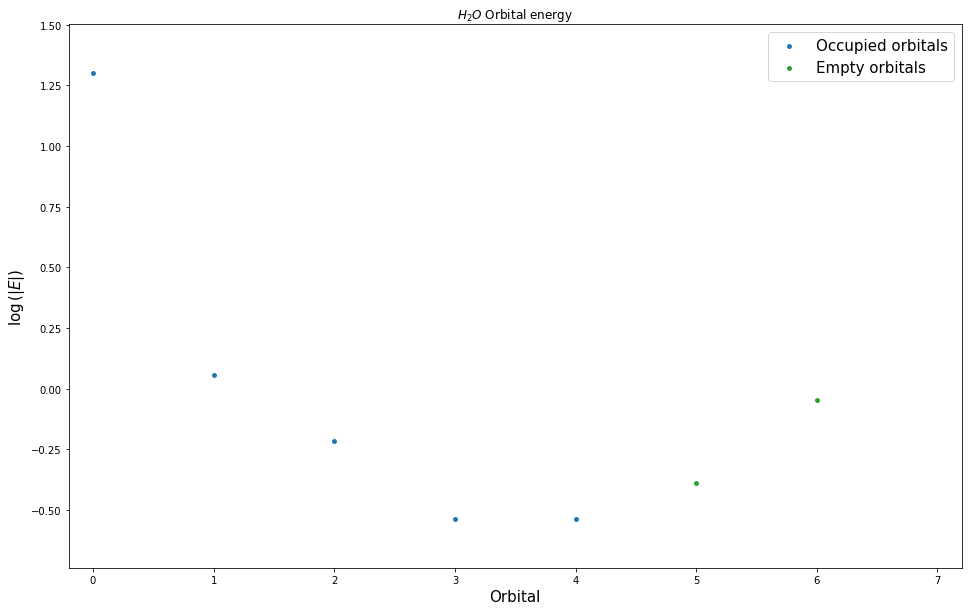

In [3]:
draw_orbitals(molecule.get_problem(), molecule.name)

## We can check which orbitals are removed 'by default'

Number of particles : (4, 4)
Number of spatial orbitals : 6
Orbital energies : [-1.1359358  -0.60909247 -0.28988608 -0.28988608  0.40909646  0.90285811]


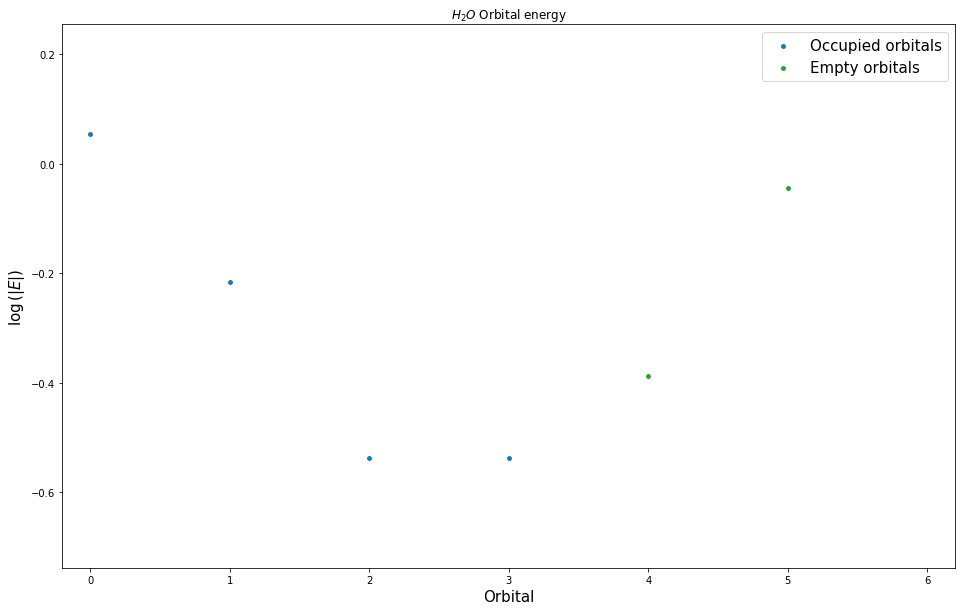

In [4]:
draw_orbitals(get_freezed_problem(molecule.get_problem()), molecule.name)

In [5]:
domain = np.linspace(0.1, 2, 20)

exact_energies = []
vqe_energies = []

for dist in domain:
  molecule.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=20, tol=0.0001),
    orbitals_to_remove=[1]
  )
  exact_energies.append(exact_res.total_energies)
  vqe_energies.append(vqe_res.total_energies)

18:36:19 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -108.488015629175
  - computed part:      -18.6685967137
  - FreezeCoreTransformer extracted energy part: -89.819418915475
~ Nuclear repulsion energy (Hartree): 87.3142398018
> Total ground state energy (Hartree): -21.173775827375
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
18:36:20 FindGroundStateExactSolver done.
18:36:20 FindGroundStateVQE started.
18:36:21 ansatz initialized
ansatz.depth = 1
num of qubits = 8
18:36:24 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -108.487622421619
  - computed part:      -18.668203506144
  - FreezeCoreTransformer extracted energy part: -89.819418915475
~ Nuclear repulsion energy (Hartree): 87.3142398018
> Total ground state energy (Hartree): -21.173382619819
 
=== MEASURED OBSER

## Plot comparison between VQE and ExactSolver

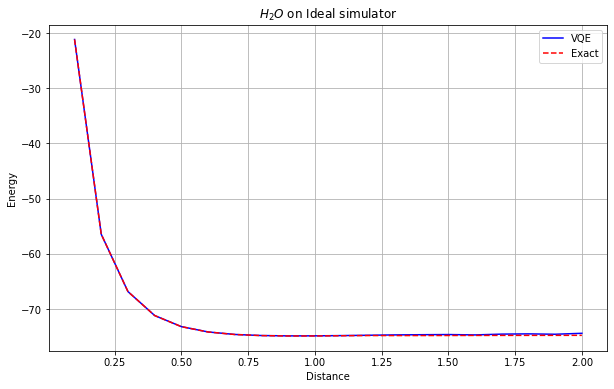

In [6]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator'
)

## Plot VQE error

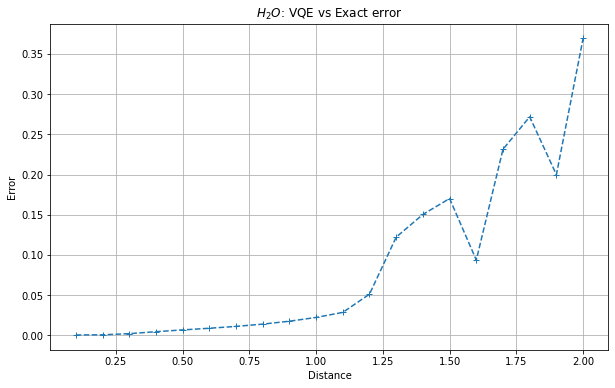

In [41]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error'
)

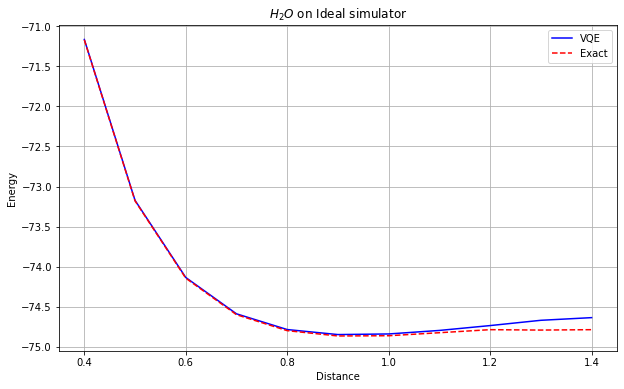

In [13]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator',
  lower_bound=0.35,
  upper_bound=1.5,
)

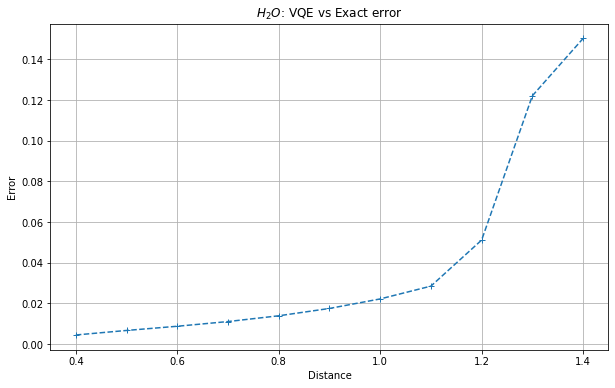

In [40]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error',
  lower_bound=0.35,
  upper_bound=1.5,
)

## Run on noisy simulator

In [9]:
noisy_domain = np.linspace(0.1, 1.5, 10)
noisy_vqe_energies = []
noisy_exact_energies = []

for dist in noisy_domain:
  molecule.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=20, tol=0.0001),
    noisy_mode=True,
    orbitals_to_remove=[1,6]
  )
  noisy_vqe_energies.append(vqe_res.total_energies)
  noisy_exact_energies.append(exact_res.total_energies)

18:38:02 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -108.487759509886
  - computed part:      -18.668340594411
  - FreezeCoreTransformer extracted energy part: -89.819418915475
~ Nuclear repulsion energy (Hartree): 87.3142398018
> Total ground state energy (Hartree): -21.173519708086
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
18:38:02 FindGroundStateExactSolver done.
18:38:02 FindGroundStateVQE started.
18:38:04 ansatz initialized
ansatz.depth = 1
num of qubits = 6
18:38:29 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -102.834699985068
  - computed part:      -13.015281069593
  - FreezeCoreTransformer extracted energy part: -89.819418915475
~ Nuclear repulsion energy (Hartree): 87.3142398018
> Total ground state energy (Hartree): -15.520460183268
 
=== MEASURED OBS

## Compare VQE on noisy simulator vs Ideal simulator & Exact solver 

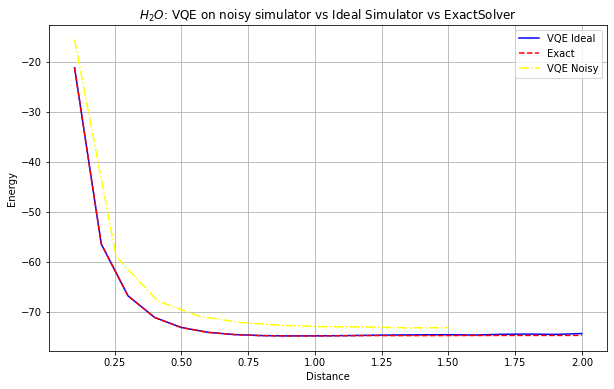

In [36]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  title=f'{molecule.name}: VQE on noisy simulator vs Ideal Simulator vs ExactSolver'
)

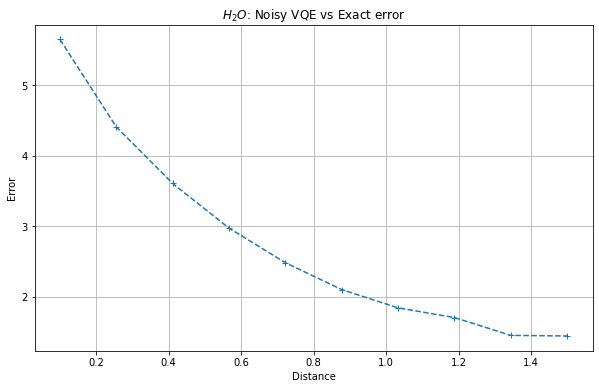

In [35]:
plot_error(
  vals_1=noisy_exact_energies,
  vals_2=noisy_vqe_energies,
  domain=noisy_domain,
  title=f'{molecule.name}: Noisy VQE vs Exact error'
)

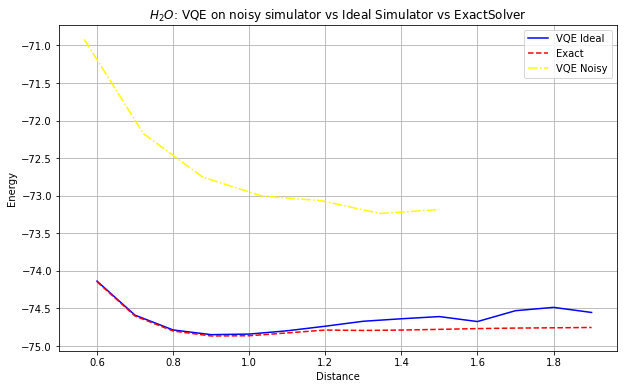

In [38]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  title=f'{molecule.name}: VQE on noisy simulator vs Ideal Simulator vs ExactSolver',
  lower_bound=0.5,
  upper_bound=2,
)

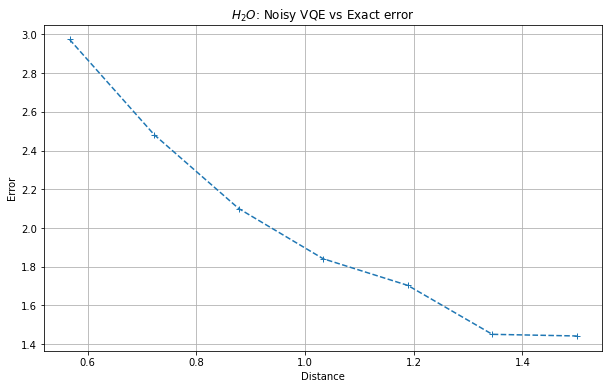

In [39]:
plot_error(
  vals_1=noisy_exact_energies,
  vals_2=noisy_vqe_energies,
  domain=noisy_domain,
  title=f'{molecule.name}: Noisy VQE vs Exact error',
  lower_bound=0.5,
  upper_bound=2,
)

## Reseach on angle (Ideal simulator)
Note: we fix optimal distance

In [16]:
opt_dist = 0.9577755948028744
# angle: 104 deg.

angle_domain = np.linspace(31, 179, 61)
angle_exact_energies = []
angle_vqe_energies = []

for angle in angle_domain:
  print(f'{angle = }')
  molecule.SetAtomCoords(([-opt_dist, 0.0, 0.0], [0.0, 0.0, 0.0], [opt_dist * np.cos(np.deg2rad(180 - angle)), opt_dist * np.sin(np.deg2rad(180 - angle)), 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=60, tol=0.0001),
    orbitals_to_remove=[1]
  )
  angle_exact_energies.append(exact_res.total_energies)
  angle_vqe_energies.append(vqe_res.total_energies)

angle = 31.0
19:33:40 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -84.486756957833
  - computed part:      -13.128029292867
  - FreezeCoreTransformer extracted energy part: -71.358727664966
~ Nuclear repulsion energy (Hartree): 9.873836881945
> Total ground state energy (Hartree): -74.612920075888
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-3.36134943  0.9321847  0.0]
 
19:33:41 FindGroundStateExactSolver done.
19:33:41 FindGroundStateVQE started.
19:33:42 ansatz initialized
ansatz.depth = 1
num of qubits = 8
19:33:49 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -84.451702492681
  - computed part:      -13.092974827715
  - FreezeCoreTransformer extracted energy part: -71.358727664966
~ Nuclear repulsion energy (Hartree): 9.873836881945
> Total ground state energy (Hartree): -74.5778

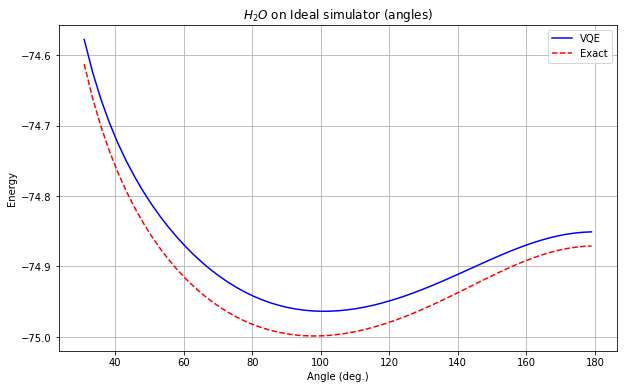

In [34]:
plot_comparisons(
  data=[angle_vqe_energies, angle_exact_energies],
  labels=['VQE', 'Exact'],
  domain=angle_domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator (angles)',
  label_x='Angle (deg.)'
)

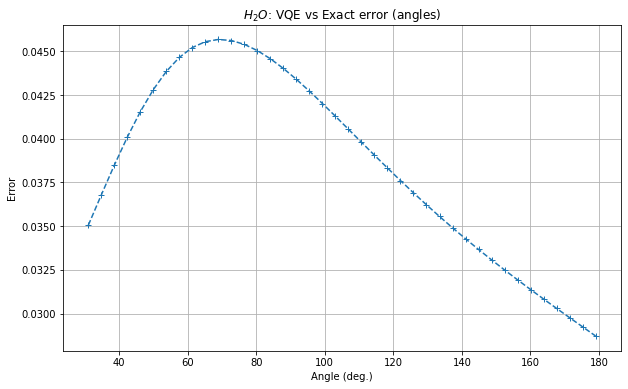

In [31]:
plot_error(
  vals_1=angle_vqe_energies,
  vals_2=angle_exact_energies,
  domain=angle_domain,
  title=f'{molecule.name}: VQE vs Exact error (angles)',
  label_x='Angle (deg.)'
)

## Reseach on angle (Noisy simulator)

In [26]:
angle_domain = np.linspace(31, 179, 40)
noisy_angle_exact_energies = []
noisy_angle_vqe_energies = []

for angle in angle_domain:
  print(f'{angle = }')
  molecule.SetAtomCoords(([-opt_dist, 0.0, 0.0], [0.0, 0.0, 0.0], [opt_dist * np.cos(np.deg2rad(180 - angle)), opt_dist * np.sin(np.deg2rad(180 - angle)), 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=45, tol=0.0001),
    orbitals_to_remove=[1, 6]
  )
  noisy_angle_exact_energies.append(exact_res.total_energies)
  noisy_angle_vqe_energies.append(vqe_res.total_energies)

angle = 31.0
19:44:47 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -84.468099744442
  - computed part:      -13.109372079476
  - FreezeCoreTransformer extracted energy part: -71.358727664966
~ Nuclear repulsion energy (Hartree): 9.873836881945
> Total ground state energy (Hartree): -74.594262862497
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-3.36134943  0.9321847  0.0]
 
19:44:47 FindGroundStateExactSolver done.
19:44:47 FindGroundStateVQE started.
19:44:47 ansatz initialized
ansatz.depth = 1
num of qubits = 6
19:44:49 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -84.460468815165
  - computed part:      -13.101741150199
  - FreezeCoreTransformer extracted energy part: -71.358727664966
~ Nuclear repulsion energy (Hartree): 9.873836881945
> Total ground state energy (Hartree): -74.5866

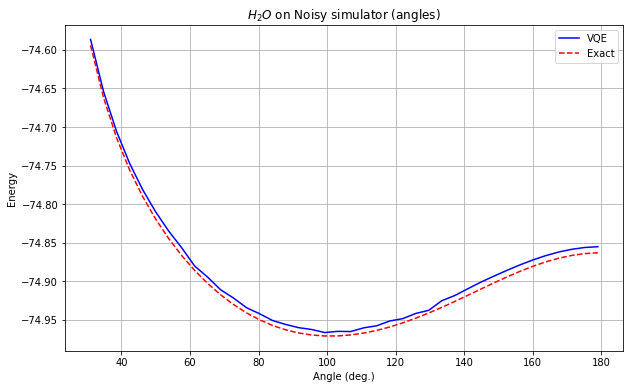

In [30]:
plot_comparisons(
  data=[noisy_angle_vqe_energies, noisy_angle_exact_energies],
  labels=['VQE', 'Exact'],
  domain=angle_domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Noisy simulator (angles)',
  label_x='Angle (deg.)'
)

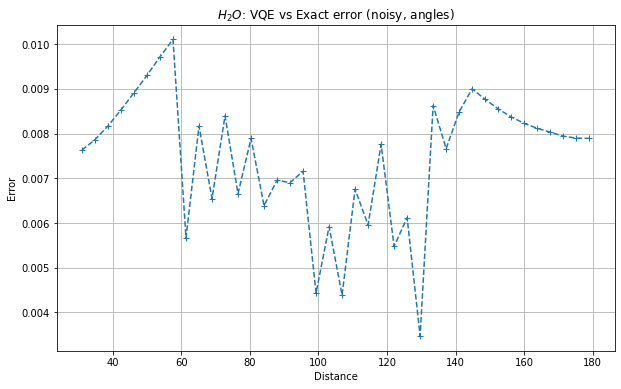

In [29]:
plot_error(
  vals_1=noisy_angle_vqe_energies,
  vals_2=noisy_angle_exact_energies,
  domain=angle_domain,
  title=f'{molecule.name}: VQE vs Exact error (noisy, angles)'
)